# Exploratory Data Analysis (EDA)
**Exploring data trends**
- Churn distribution
- Customer demographics & churn
- Contract & payment method impact
- Service usage vs. churn
- Tenure & monthly charges impact
- Correlation analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset
df = pd.read_csv("cleaned_data.csv")

# Create a directory for saving figures
figures_dir = "Visuals"
os.makedirs(figures_dir, exist_ok=True)

/var/folders/94/m84r7gw139ndfj_sklt8kxbc0000gn/T/ipykernel_6448/1199674907.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="Churn", palette=palette)


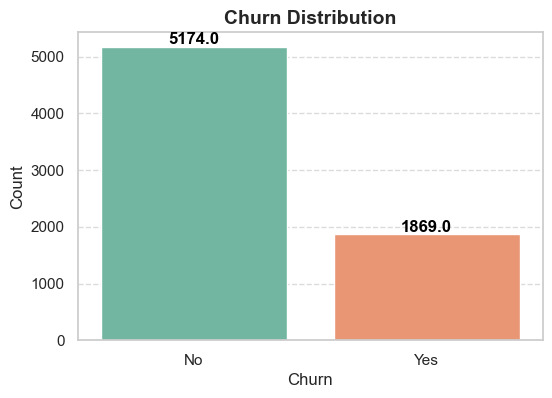

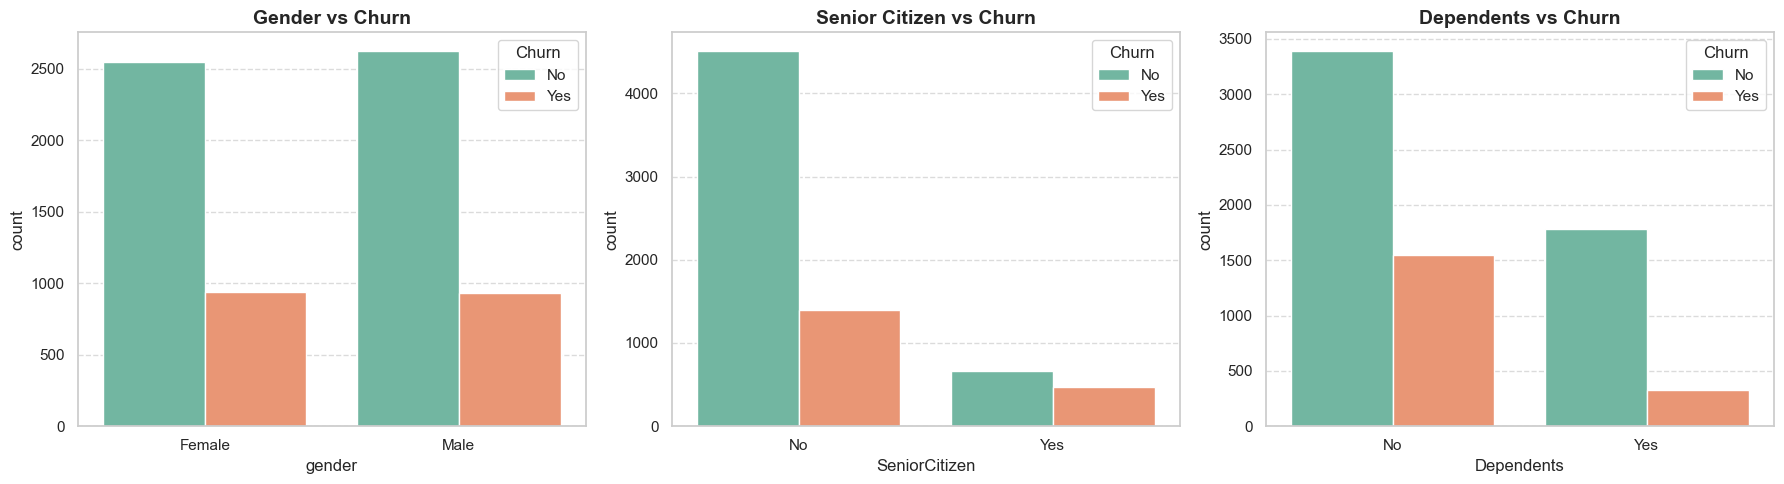

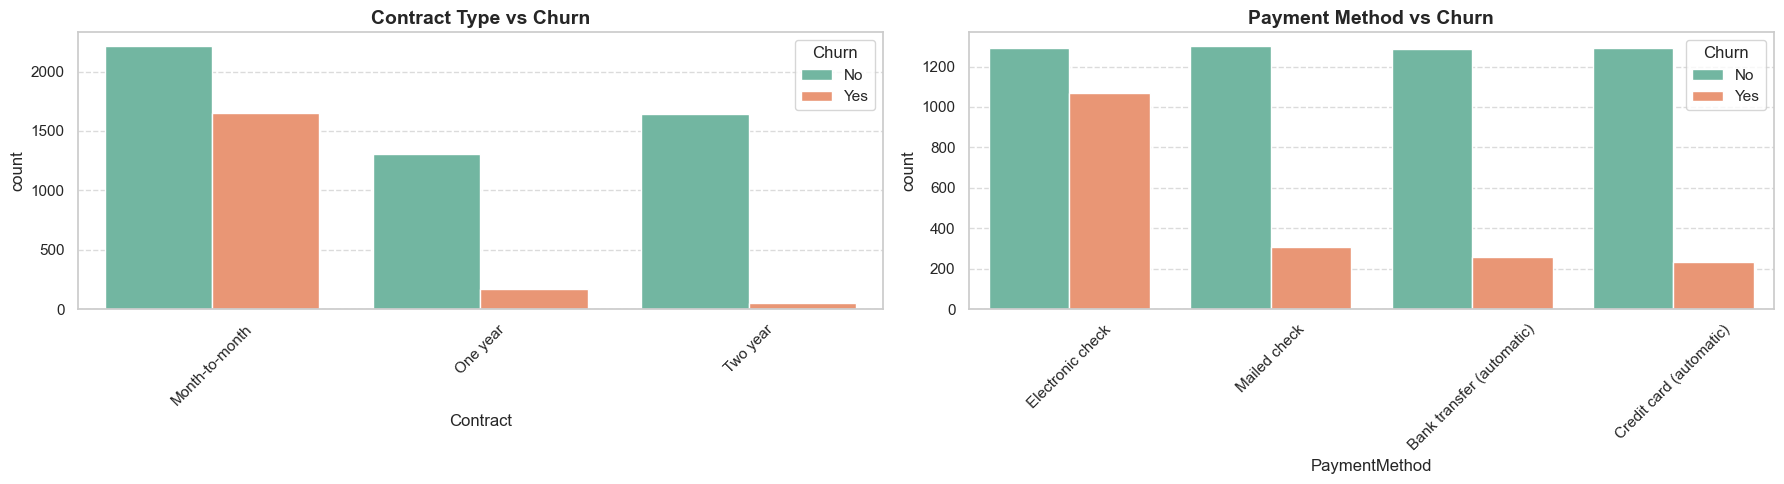

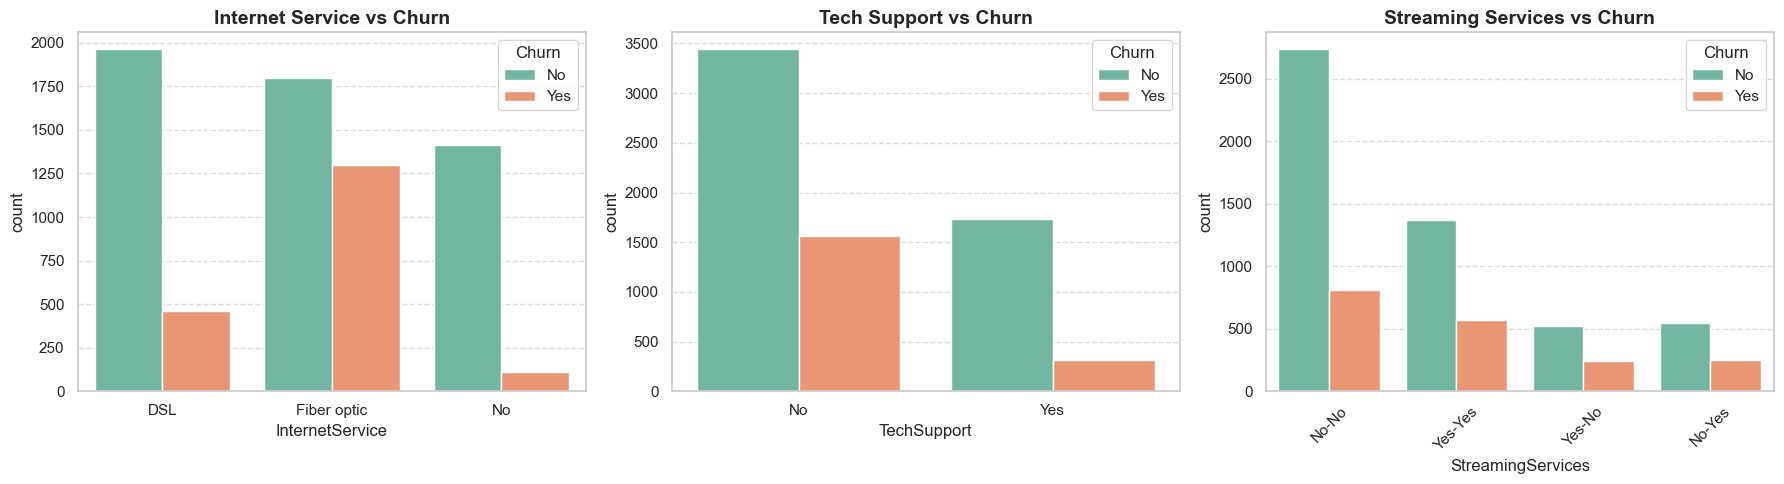

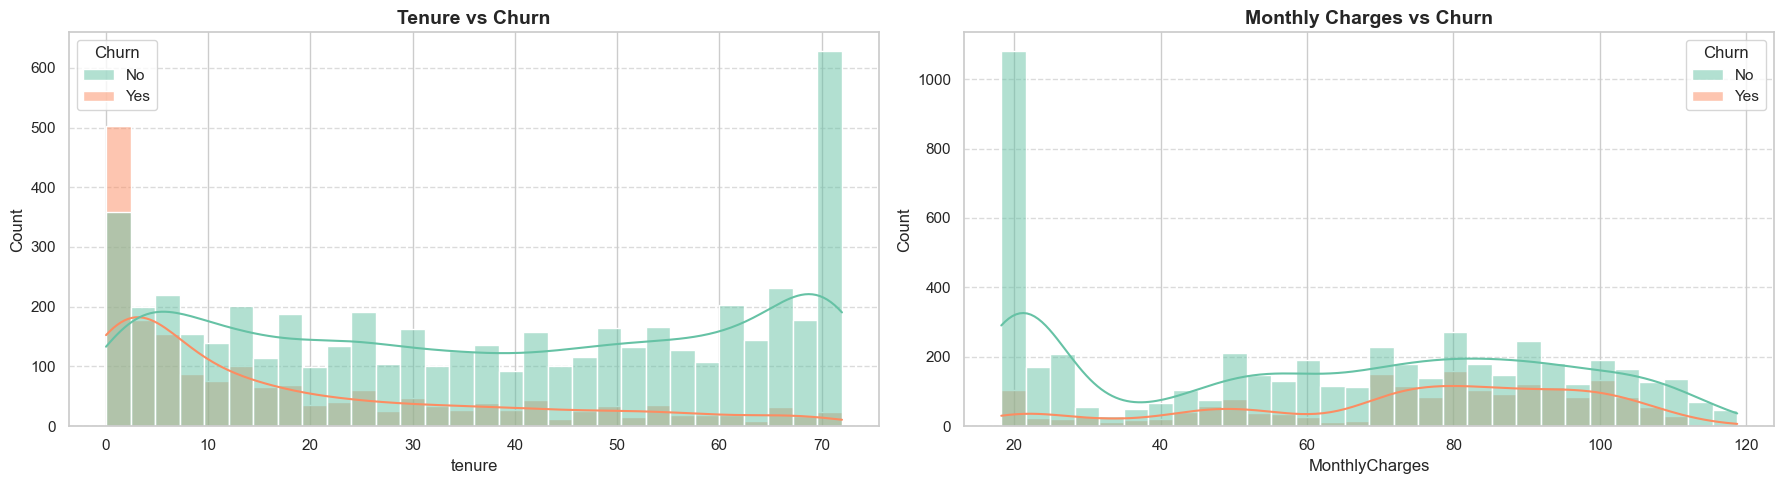

In [2]:
# Set plot style
sns.set(style="whitegrid", rc={"axes.labelsize": 12, "axes.titlesize": 14, "axes.titleweight": "bold"})

# Define a more visually appealing palette
palette = "Set2"

# Churn Distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x="Churn", palette=palette)
plt.title("Churn Distribution", fontweight="bold")
plt.xlabel("Churn")
plt.ylabel("Count")

# Show count labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height() + 50), 
                ha='center', fontsize=12, fontweight="bold", color="black")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(os.path.join(figures_dir, "churn_distribution.png"))
plt.show()

# Customer Demographics & Churn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

cols = ["gender", "SeniorCitizen", "Dependents"]
titles = ["Gender vs Churn", "Senior Citizen vs Churn", "Dependents vs Churn"]

for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, hue="Churn", palette=palette, ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(os.path.join(figures_dir, "customer_demographics_vs_churn.png"))
plt.show()

# Contract & Payment Method Impact on Churn
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

cols = ["Contract", "PaymentMethod"]
titles = ["Contract Type vs Churn", "Payment Method vs Churn"]

for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, hue="Churn", palette=palette, ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(os.path.join(figures_dir, "contract_payment_method_vs_churn.png"))
plt.show()

# Service Usage & Churn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

cols = ["InternetService", "TechSupport"]
titles = ["Internet Service vs Churn", "Tech Support vs Churn"]

for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, hue="Churn", palette=palette, ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Create a combined column for Streaming Services
df["StreamingServices"] = df["StreamingTV"] + "-" + df["StreamingMovies"]
sns.countplot(data=df, x="StreamingServices", hue="Churn", palette=palette, ax=axes[2])
axes[2].set_title("Streaming Services vs Churn")
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(os.path.join(figures_dir, "service_usage_vs_churn.png"))
plt.show()

# Tenure & Monthly Charges Impact
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

cols = ["tenure", "MonthlyCharges"]
titles = ["Tenure vs Churn", "Monthly Charges vs Churn"]

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, hue="Churn", bins=30, kde=True, palette=palette, ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(os.path.join(figures_dir, "tenure_monthly_charges_vs_churn.png"))
plt.show()